# EFC2
Exercícios de fixação em classificação binária e multiclasse

# Atividade 1

Regressão Logística Binária para o conjunto de dados de voz divido em gêneros masculino e feminino.

In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
# função para o cálculo do RMSE
def rmse(y, yhat):
    return np.sqrt( np.power(y - yhat, 2).mean() )

In [2]:
dados = genfromtxt('dados_voz_genero.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remove cabeçalho
print(dados)

[[0.06424127 0.03202691 0.01507149 ... 0.         0.         1.        ]
 [0.06731003 0.04022874 0.01941387 ... 0.046875   0.05263158 1.        ]
 [0.08382942 0.03671846 0.00870106 ... 0.0078125  0.04651163 1.        ]
 ...
 [0.09579843 0.18373124 0.03342387 ... 2.9296875  0.19475862 0.        ]
 [0.09062826 0.18497617 0.0435081  ... 3.5859375  0.31100218 0.        ]
 [0.09288354 0.18304392 0.0700715  ... 0.546875   0.35       0.        ]]


In [16]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Normalização
Pré processamento dos dados por meio da normalização

In [17]:
Xtrain_norm = Xtrain
Xtest_norm = Xtest
nstd = 4
for i in range(0,len(Xtrain[0,:])):
    Xtrain_norm[:,i] = (Xtrain[:,i] - Xtrain[:,i].mean())/(nstd*Xtrain[:,i].std())
    Xtest_norm[:,i] = (Xtest[:,i] - Xtest[:,i].mean())/(nstd*Xtest[:,i].std())

([array([  0.,   0.,   0.,  85., 257., 251.,  38.,   3.,   0.,   0.]),
  array([  0.,   1.,  13.,  58., 236., 319.,   7.,   0.,   0.,   0.]),
  array([  0.,   0.,   7.,  57., 289., 256.,  25.,   0.,   0.,   0.]),
  array([  1.,   1.,   8.,  37., 284., 295.,   8.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,  65., 231., 307.,  27.,   4.,   0.,   0.]),
  array([  0.,   0.,   0.,   0., 572.,  35.,   4.,   8.,  12.,   3.]),
  array([  0.,   0.,   0.,   0., 597.,  11.,   4.,   8.,   9.,   5.]),
  array([  0.,   0.,   3.,  67., 251., 286.,  27.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,  45., 317., 214.,  58.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 101., 168., 365.,   0.,   0.,   0.,   0.]),
  array([  0.,   1.,  10.,  61., 231., 309.,  22.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,  63., 294., 242.,  35.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   3., 299., 311.,  15.,   1.,   2.,   3.]),
  array([  0.,   8.,  12.,  42., 171., 401.,   0.,   0.,   0.,   0.]),
  arra

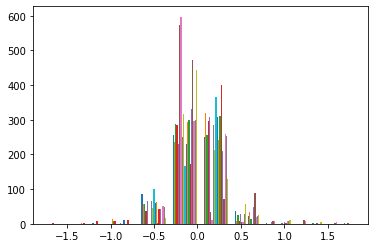

In [19]:
plt.hist(Xtest_norm)

In [14]:
# regressão logística pela biblioteca SkLearn com os dados normalizados
logreg = LogisticRegression(max_iter=3500)
logreg.fit(Xtrain_norm, ytrain)
ypred_norm = logreg.predict(Xtest_norm)

print("Root Mean Square Error:",rmse(ytest,ypred_norm))
print("Score:",logreg.score(Xtest_norm,ytest))

Root Mean Square Error: 0.17761120833134697
Score: 0.9684542586750788


In [20]:
# matriz de confusão para threshold = 0.5
cmatrix = sk.confusion_matrix(ytest,ypred_norm)
print(cmatrix)

[[289  12]
 [  8 325]]


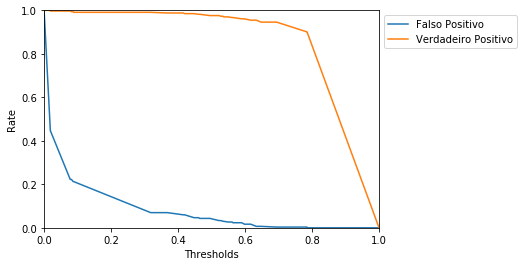

In [21]:
# curva ROC
# fpr = falso positivo
# tpr = verdadeiro positivo
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest_norm)[:,1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.plot(thresholds,fpr,label='Falso Positivo')
plt.plot(thresholds,tpr,label = 'Verdadeiro Positivo')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

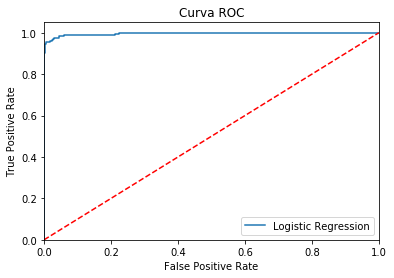

In [22]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [23]:
# melhor valor para threshold a partir da média geométrica
geo = np.sqrt(tpr * (1-fpr))
index_geo = np.argmax(geo)
print('Best Threshold = %f' % thresholds[index_geo])

Best Threshold = 0.633901


In [24]:
# predição com o valor ótimo encontrado para threshold
ypred1 = (logreg.predict_proba(Xtest)[:,1] >= thresholds[index_geo]).astype(int)

print("Root Mean Square Error:",rmse(ytest,ypred1))

Root Mean Square Error: 0.16374944313243622


In [30]:
# matriz de confusão para o Best Threshold
cmatrix1 = sk.confusion_matrix(ytest,ypred1)
print(cmatrix1)

[[299   2]
 [ 15 318]]


# Atividade 2
Classificação multi-classe na identificação de atividade humana usando dados de smartphones

A base de dados contém 6 classes, 561 atributos, 7352 amostras de treino e 2947 amostras de teste.

In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [32]:
X_test = genfromtxt('X_test.txt')
X_train = genfromtxt('X_train.txt')
y_test = genfromtxt('y_test.txt')
y_train = genfromtxt('y_train.txt')

In [46]:
# pela classificação one-vs-all temos
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[5. 5. 5. ... 2. 2. 1.]


In [48]:
print("Root Mean Square Error:",rmse(y_test,y_pred))

# matriz de confusão para threshold default de 0.5
cmatrix = sk.confusion_matrix(y_test,y_pred)
print(cmatrix)

Root Mean Square Error: 0.2512270531534619
[[490   4   2   0   0   0]
 [ 16 453   2   0   0   0]
 [  7  20 393   0   0   0]
 [  0   3   0 437  51   0]
 [  1   0   0  29 502   0]
 [  0   0   0   0   0 537]]


# Rascunhos

In [26]:
# regressão logística pela biblioteca SkLearn sem a normalização
logreg = LogisticRegression(max_iter=3500)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)

print("Root Mean Square Error:",rmse(ytest,ypred))
print("Score:",logreg.score(Xtest,ytest))

Root Mean Square Error: 0.17761120833134697
Score: 0.9684542586750788


Text(0.5, 1, 'Accuracy Score: 0.9685')

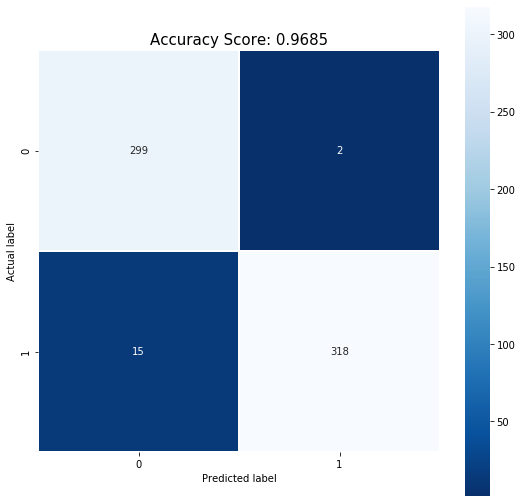

In [27]:

plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(logreg.score(Xtest, ytest))
plt.title(all_sample_title, size = 15)